# Descripción
Analisis con Pandas y Kaggle (Core)


#Objetivo

El objetivo de esta actividad es poner en práctica todos los conocimientos adquiridos sobre Pandas a través del análisis completo de un dataset. Los estudiantes deben aplicar técnicas de carga, exploración, limpieza, transformación, y agregación de datos para extraer insights valiosos. *La actividad no incluye visualización de datos, enfocándose únicamente en el análisis y manipulación de datos con Pandas.*



# **Instrucciones, desarrollo y análisis**

# **1) Preparación del Entorno**
- Asegúrate de tener instalado Pandas en tu entorno de trabajo.
- Descarga el archivo dataset.csv desde Kaggle. Elige un dataset que te interese y que no incluya visualización de datos. Algunas sugerencias pueden ser datasets relacionados con ventas, compras, productos, etc.


***Decidí trabajar con este dataset de Kaggle***
https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/code

- Título: **Trabajo a distancia y salud mental 🌍🧠**
Análisis del bienestar mental en la era del trabajo a distancia

- Descripción: A medida que el trabajo a distancia se convierte en la nueva norma, es esencial comprender su impacto en el bienestar mental de los empleados. Este conjunto de datos se sumerge en cómo el trabajo a distancia afecta a los niveles de estrés, el equilibrio entre la vida laboral y personal, y las condiciones de salud mental en varios sectores y regiones.

    Con 5.000 registros recopilados de empleados de todo el mundo, este conjunto de datos proporciona información valiosa sobre áreas clave como la ubicación del trabajo (remoto, híbrido, presencial), los niveles de estrés, el acceso a recursos de salud mental y la satisfacción laboral. Está diseñado para ayudar a investigadores, profesionales de RRHH y empresas a evaluar la creciente influencia del trabajo remoto en la productividad y el bienestar. 🌿📈

In [85]:
import pandas as pd

#**2) Cargar los Datos**
- Carga el archivo CSV en un DataFrame de Pandas.
- Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.


In [86]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

  Employee_ID  Age             Gender           Job_Role       Industry  \
0     EMP0001   32         Non-binary                 HR     Healthcare   
1     EMP0002   40             Female     Data Scientist             IT   
2     EMP0003   59         Non-binary  Software Engineer      Education   
3     EMP0004   27               Male  Software Engineer        Finance   
4     EMP0005   49               Male              Sales     Consulting   
5     EMP0006   59         Non-binary              Sales             IT   
6     EMP0007   31  Prefer not to say              Sales             IT   
7     EMP0008   42         Non-binary     Data Scientist  Manufacturing   
8     EMP0009   56  Prefer not to say     Data Scientist     Healthcare   
9     EMP0010   30             Female                 HR             IT   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote            

# **3) Exploración Inicial de los Datos**
- Muestra las últimas 5 filas del DataFrame.
- Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
- Genera estadísticas descriptivas del DataFrame utilizando el método describe().

In [87]:
# Mostrar las últimas 5 filas del DataFrame
print("Últimas filas del DataFrame:")
print(df.tail(5))

# Obtener información general sobre el DataFrame
print("\n\n\nInformación del DataFrame:")
print(df.info())

# Generar estadísticas descriptivas
print("\n\n\nEstadísticas descriptivas para variables numéricas del DataFrame:")
print(df.describe())


Últimas filas del DataFrame:
     Employee_ID  Age  Gender Job_Role    Industry  Years_of_Experience  \
4995     EMP4996   32    Male    Sales  Consulting                    4   
4996     EMP4997   39  Female    Sales  Healthcare                   27   
4997     EMP4998   42  Female    Sales  Healthcare                   21   
4998     EMP4999   27  Female    Sales  Healthcare                   26   
4999     EMP5000   29    Male       HR          IT                   30   

     Work_Location  Hours_Worked_Per_Week  Number_of_Virtual_Meetings  \
4995        Onsite                     24                           2   
4996        Onsite                     48                          15   
4997        Hybrid                     34                           1   
4998        Remote                     58                           0   
4999        Onsite                     20                          15   

      Work_Life_Balance_Rating Stress_Level Mental_Health_Condition  \
4995      

## Análisis

1. Hay 5.000 entradas o datos, con índices de 0 to 4999
2. Columnas como "Mental_Health_Condition" y "Physical_Activity" tiene datos nulos
        --> Se debe revisar que tipo o clase de nulos son, y si generan algún tipo de interferencia en los análisis que se planteen

3. Hay 20 columnas donde solo 7 son de tipo int64 (pero 3 son "valoraciones" u estalas de tipo cualitativo), el restante son columnas de tipo object
        --> Se debe revisar documentación para entender dichas variables de mejor manera y poder realizar algún tipo de análisis

4. El rango de edad en el dataset va de los 22 a los 40 años
        --> ¿Se podrían manejar rangos?
    Los años de experiencia van desde 1 hasta los 35 años
        --> ¿Se puede relacionar esta variable con edad y revisar con cuales tienen mejor relación?
    Si bien la cantidad de horas de trabajo por semana son en promedio 40, existe un valor mínimo de 20, un q3 de 50 y un máximo de 60
            --> ¿Hay algún o algunas variables que se relacionen más o mejor con más o menos cantidad de horas trabajadas por semana, en comparación de la media?
    Reuniones virtuales
            --> ¿A qué hace referencia el número de reuniones virtuales, tienen alguna medida?
    Variables como *Work_Life_Balance_Rating*, *Social_Isolation_Rating* y *Company_Support_for_Remote_Work* son en efecto una valoración o una variable cualitativa
            --> ¿Se puede descodificar la variable?
            --> En caso de que no se pueda descodificar ¿se debería cambiar el tipo de dato a object? Puesto que, a diferencia de frecuencia o moda, otros datos estadísticos pueden dar algún tipo de información útil

### Otra exploración de los datos

In [88]:
# Contar valores únicos en las columnas del DataFrame y de manera ordenada
for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].value_counts().sort_index())


Conteo de valores únicos en la columna 'Employee_ID':
Employee_ID
EMP0001    1
EMP0002    1
EMP0003    1
EMP0004    1
EMP0005    1
          ..
EMP4996    1
EMP4997    1
EMP4998    1
EMP4999    1
EMP5000    1
Name: count, Length: 5000, dtype: int64

Conteo de valores únicos en la columna 'Age':
Age
22    131
23    142
24    138
25    145
26    109
27    129
28    131
29    112
30    133
31    124
32    133
33    119
34    120
35    119
36    132
37    112
38    115
39    130
40    135
41    124
42    135
43    137
44    111
45    149
46    121
47    138
48    136
49    132
50    138
51    129
52    125
53    152
54     99
55    112
56    136
57    135
58    138
59    119
60    125
Name: count, dtype: int64

Conteo de valores únicos en la columna 'Gender':
Gender
Female               1274
Male                 1270
Non-binary           1214
Prefer not to say    1242
Name: count, dtype: int64

Conteo de valores únicos en la columna 'Job_Role':
Job_Role
Data Scientist       696
Designer  

### Propuestas de ChatGPT según el dataset

1. Análisis Demográfico y de Distribución
Distribución por género y edad:

    Crear histogramas o gráficos de barras para visualizar la distribución de género y la edad.
    Análisis cruzado entre género y edad para identificar grupos demográficos predominantes.
    Distribución por región:

    Graficar la cantidad de empleados por región y comparar las diferencias.
    Relacionar región con otras variables, como Stress_Level o Productivity_Change.

2. Análisis de Productividad y Bienestar
    Relación entre Stress_Level y Productivity_Change:

    Usar tablas de contingencia para observar cómo el nivel de estrés afecta la productividad.
    Realizar una prueba estadística (como chi-cuadrado) para validar si existe una relación significativa.
    Efecto de la Sleep_Quality en el bienestar:

    Comparar la calidad del sueño con variables como Stress_Level y Work_Life_Balance_Rating.
    Impacto de la actividad física (Physical_Activity):

    Analizar si los empleados con actividad física diaria reportan menores niveles de estrés o mayores niveles de satisfacción con el trabajo remoto.

3. Análisis del Trabajo Remoto
Satisfacción con el trabajo remoto:

    Relacionar Satisfaction_with_Remote_Work con Work_Location para identificar si los empleados híbridos, remotos u onsite están más satisfechos.
    Apoyo de la empresa:

    Explorar cómo Company_Support_for_Remote_Work afecta la satisfacción con el trabajo remoto y la productividad.
    Número de reuniones virtuales:

    Analizar la relación entre Number_of_Virtual_Meetings y el nivel de estrés o la percepción de aislamiento social (Social_Isolation_Rating).

4. Análisis del Rol y la Industria
    Diferencias entre roles:

    Comparar niveles de estrés, productividad y balance vida-trabajo entre diferentes Job_Role.
    Análisis por industria:

    Explorar si ciertas industrias tienen mayor satisfacción o mejores niveles de balance vida-trabajo.

5. Análisis Multivariable
Clustering (agrupamiento):

    Usar variables como Stress_Level, Work_Life_Balance_Rating, Satisfaction_with_Remote_Work y Productivity_Change para segmentar a los empleados en grupos con características similares.
    Regresión logística:

    Predecir variables categóricas como Productivity_Change o Satisfaction_with_Remote_Work usando variables como Work_Location, Stress_Level y Sleep_Quality.
    Análisis de factores:

    Reducir dimensionalidad para entender las principales variables que explican el bienestar y la productividad.

6. Análisis Estadístico
Pruebas de hipótesis:

    Prueba ANOVA para evaluar si hay diferencias significativas en Work_Life_Balance_Rating o Stress_Level entre los distintos roles o industrias.
    Prueba de correlación para evaluar relaciones entre variables numéricas, como Hours_Worked_Per_Week y Stress_Level.
    Análisis de outliers:

    Detectar empleados con valores atípicos en horas trabajadas, productividad, o nivel de estrés.

7. Análisis Temporal
    Si tienes datos de tiempo, podrías analizar:

    Cambios en la productividad y estrés a lo largo de semanas, meses o trimestres.
    Relación entre la cantidad de reuniones virtuales y el cambio en productividad durante un periodo específico.

8. Visualización de Datos
Mapas geográficos:

    Visualizar datos regionales, como niveles de estrés o productividad, en un mapa para identificar tendencias geográficas.
    Diagramas de dispersión:

    Relacionar variables como Hours_Worked_Per_Week con Productivity_Change para identificar tendencias.
    Matriz de correlación:

    Crear un heatmap para entender cómo las variables numéricas están relacionadas entre sí.

9. Análisis Predictivo (si aplicable)
    Usar modelos de aprendizaje automático para predecir:
    Nivel de satisfacción (Satisfaction_with_Remote_Work) con base en otras variables.
    Cambios en productividad según el estrés, balance vida-trabajo y apoyo de la empresa.

10. Reportes Ejecutivos
    Preparar resúmenes y dashboards para mostrar:
    Principales hallazgos sobre bienestar y productividad.
    Diferencias clave entre roles, industrias y ubicaciones.
    Recomendaciones para mejorar el balance vida-trabajo y reducir el estrés.

# **4) Limpieza de datos**
- Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).
- Corrige los tipos de datos si es necesario (por ejemplo, convertir cadenas a fechas).
- Elimina duplicados si los hay.

In [89]:
# Revisar en que variables hay datos nulos o faltantes y observar su porcentaje para determinar qué hacer
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos_positivos = porcentaje_nulos[porcentaje_nulos > 0]

print(df.isnull().sum()[df.isnull().sum() > 0],"\n")
print(porcentaje_nulos_positivos)

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64 

Mental_Health_Condition    23.92
Physical_Activity          32.58
dtype: float64


## Análisis
Dado que los porcentajes de datos faltantes son tan altos, la eliminación de estos puede tener repercusión en los análisis que se realicen, por ello debe hacer altún tipo de imputación de datos. Revisando las variables problema con sus valores:

- Mental_Health_Condition: Anxiety - 1278, Burnout - 1280, Depression - 1246, NULOS - 1196
- Physical_Activity: Daily - 1616, Weekly - 1755, NULOS - 1629

Se podría llegar a suponer que, el dataset proviene de una encuesta, y por ello, eran o casillas o selección de algún tipo, donde se podría dar a entender que solo estaban algunas opciones y no se consideró todo el espectro. En este caso pareciese que no se contempló un tipo de condición de salud mental nulo o no aplica o simplemente "NO", así como tampoco, si la persona no realiza actividad física.



### ***Extra***

-- El siguiente código es de un bootcamp que he realizado previamente a inicios de año del 2024, lo traígo a colación por si puede ser de interés (la verdad en su momento no lo había analizado bien y tampoco prestado mucha atención), de manera gráfica me da diferentes indicaciones.

Así, podría decirse que estos datos faltantes en ambas columnas pueden deberse al azar, pero que también podría estar relacionados con otras variables, pero esto de manera gráfica es difícil de corroborar, y al momento no tengo el conocimiento o las habilidades para determinar esto de la mejor manera

Supondría que, para hacer la imputación de estos datos, se deben revisar otras técnicas... En lo poco que vi, KNN podría ser una opción, pero, por un lado me rellenaría con la moda y por otro de forma al azar en base a los vecinos más cercanos... Así que lo realizaré conforme lo visto en el curso

In [90]:
#@title funciones de graficas valores nulos o faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])

  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)

  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(20,29))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)



  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()

****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
                             Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0                   Physical_Activity            3371         1629    32.58
1             Mental_Health_Condition            3804         1196    23.92
2                         Employee_ID            5000            0     0.00
3                                 Age            5000            0     0.00
4                       Sleep_Quality            5000            0     0.00
5     Company_Support_for_Remote_Work            5000            0     0.00
6       Satisfaction_with_Remote_Work            5000            0     0.00
7             Social_Isolation_Rating            5000            0     0.00
8                 Productivity_Change            5000   

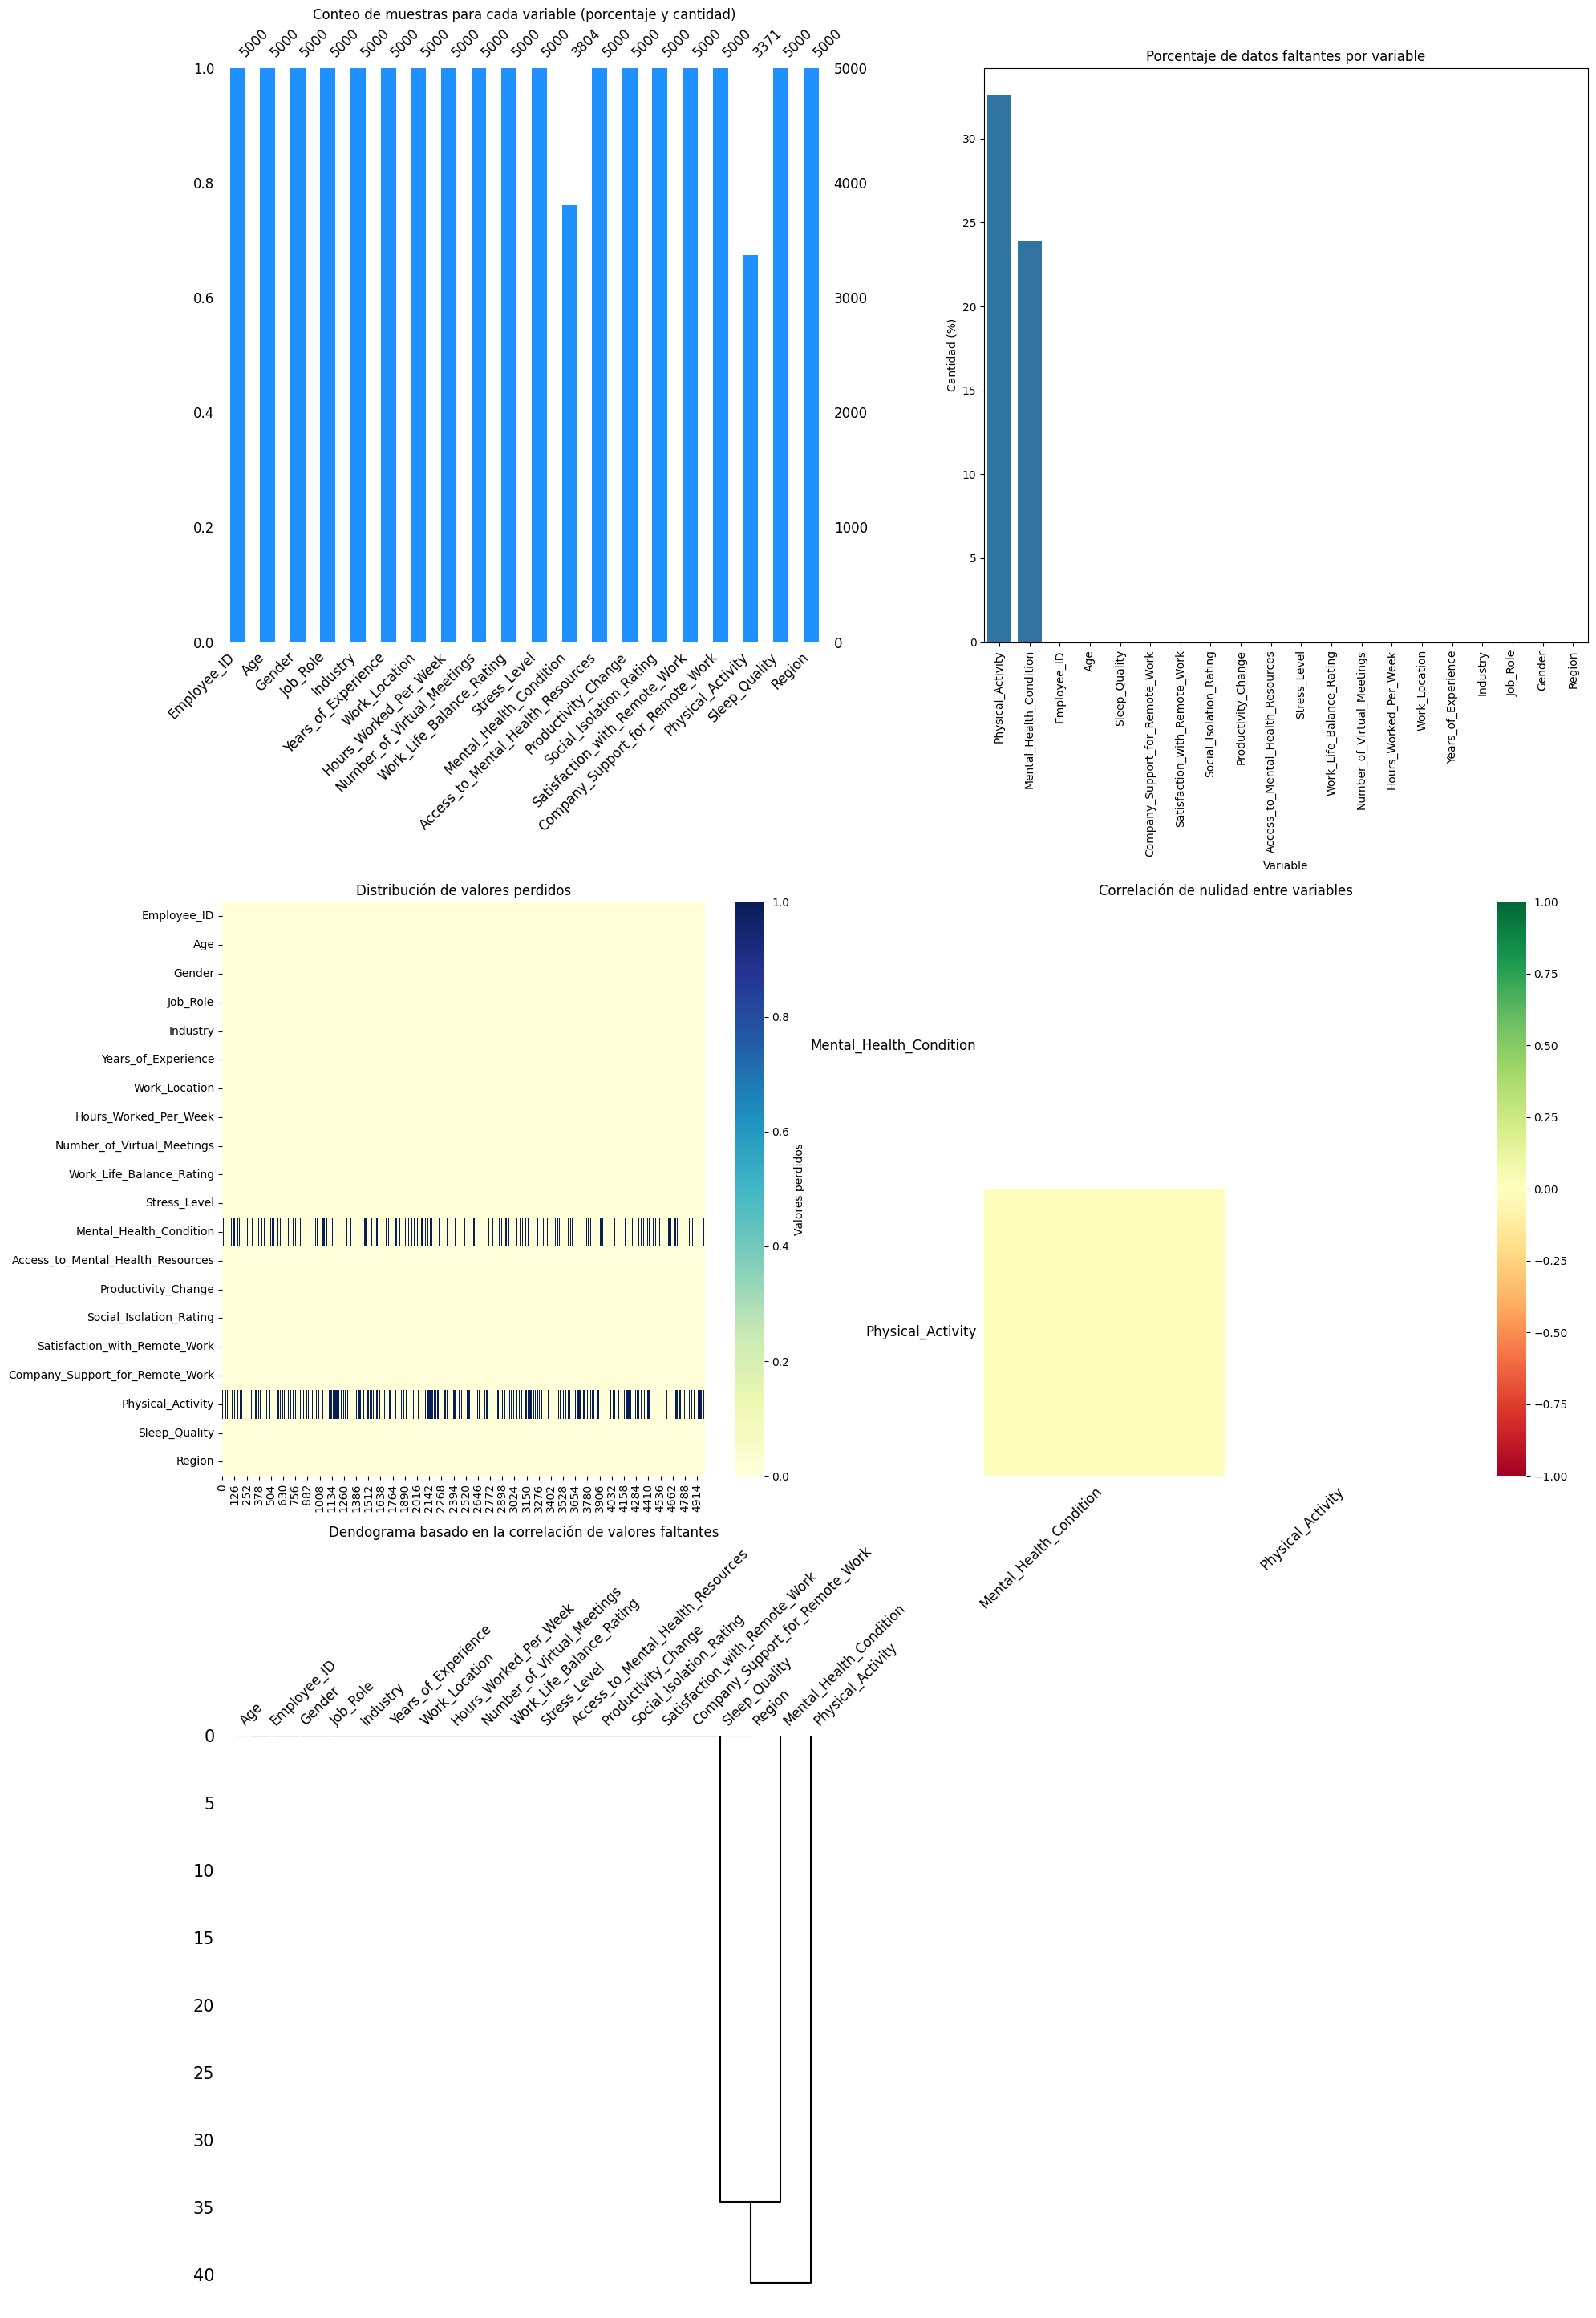

In [91]:
#@title graficas valores nulos o faltantes
report_missings(df)

## Retomando el Core
- Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).
- Corrige los tipos de datos si es necesario (por ejemplo, convertir cadenas a fechas).
- Elimina duplicados si los hay.

In [92]:
# Revisar en que variables hay datos nulos o faltantes y observar su porcentaje para determinar qué hacer
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos_positivos = porcentaje_nulos[porcentaje_nulos > 0]

print(df.isnull().sum()[df.isnull().sum() > 0],"\n")
print(porcentaje_nulos_positivos)

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64 

Mental_Health_Condition    23.92
Physical_Activity          32.58
dtype: float64


In [93]:
# Imputar valores nulos
df.fillna("DOES NOT APPLY", inplace=True)

- En la documentación del dataset no se encontró alguna asociasión con las variables que parecen más valoraciones a variables numéricas, así que se procede a transformar dichas variables

In [94]:
# Corregir tipos de datos
columnas_a_convertir = ['Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']

# Convertir las columnas a tipo string
df[columnas_a_convertir] = df[columnas_a_convertir].astype('str')

# Verificar si se realizaron los cambios
print("Verificando que se hayan aplicado los cambios en el tipo de dato necesarios\n\n",df.dtypes)

Verificando que se hayan aplicado los cambios en el tipo de dato necesarios

 Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating             object
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating              object
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work      object
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object


In [95]:
# Consultar si hay duplicados, cuántos
print("a. ¿Hay duplicados en el DataFrame?")
print(df.duplicated().any())
print("\nb. ¿Cuántos duplicados hay en el DataFrame?")
print(df.duplicated().sum())

# Eliminar duplicados
# df = df.drop_duplicates()
# lo dejo como código comentado, ya que no existen duplicados en el DataFrame

a. ¿Hay duplicados en el DataFrame?
False

b. ¿Cuántos duplicados hay en el DataFrame?
0


# **5) Transformación de Datos**

- Crea nuevas columnas basadas en operaciones con las columnas existentes (por ejemplo, calcular ingresos a partir de ventas y precios).
- Normaliza o estandariza columnas si es necesario.
- Clasifica los datos en categorías relevantes.

In [96]:
# Crear una nueva columna con base a alguna existente
def seniority(years):
    if years <= 5:
        return 'Junior'
    elif 5 < years <= 10:
        return 'Semi-Senior'
    else:
        return 'Senior'

df['Seniority'] = df['Years_of_Experience'].apply(seniority)

# También se podría con esta con varios if (casi no lo logramos con Cristian)
# df['Seniority'] = df['Years_of_Experience'].apply(lambda x: 'Junior' if x <= 2 else ('Semi-Senior' if 2 < x <= 6 else 'Senior'))
print(df)

     Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote            

In [97]:
# Clasificar datos en categorías relevantes
df['Feels_Stress'] = df['Stress_Level'].apply(lambda x: 'No' if x == 'Low' else 'Yes')
print(df)

     Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote            

## Análisis
1. Se calculó una columna nueva para determinar el seniority en base a los años de experiencia.
2. No vi necesidad de normalizar alguno de las variables, en caso puntual serían años de experiencia o edad, pero la gracia de los datos como están es poder ver un "histograma" supongo.
    No sé si transformar una columna categórica cuente como normalizar, porque variables como el nivel de estres se podría recodificar como:
        Stress_Level: Low=0, Medium=1, High=2.
3. Se agregó una columna basado en el nivel de estrés, donde se determinó que si el nivel era bajo, el sentimiento de estrés fuera "NO", pero si es medio o alto fuera  "YES"



PD: En cuanto a esta última parte (Clasifica los datos en categorías relevantes.) no me quedó claro a qué se hacía referencia o qué se pedía

# **6) Análisis de Datos**

- Realiza agrupaciones de datos utilizando groupby para obtener insights específicos (por ejemplo, ventas por producto, ventas por región, etc.).
- Aplica funciones de agregación como sum, mean, count, min, max, std, y var.
- Utiliza el método apply para realizar operaciones más complejas y personalizadas.


In [98]:
grupo_1 = df.groupby(['Region', 'Gender', 'Work_Location', 'Seniority', 'Feels_Stress', 'Access_to_Mental_Health_Resources'])

grupo_1_horas_laborales_semanales = grupo_1['Hours_Worked_Per_Week'].agg(['min', 'median', 'max', 'mean']).round(1)
grupo_1_horas_laborales_semanales

min  \
Region        Gender            Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources        
Africa        Female            Hybrid        Junior      No           No                                  22   
                                                                       Yes                                 24   
                                                          Yes          No                                  37   
                                                                       Yes                                 23   
                                              Semi-Senior No           No                                  47   
...                                                                                                       ...   
South America Prefer not to say Remote        Semi-Senior Yes          Yes                                 23   
                                              Senior      No           No                                  30   
                                                                       Yes                                 20   
                                                          Yes          No                                  21   
                                                                       Yes                                 20   

                                                                                                          median  \
Region        Gender            Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources           
Africa        Female            Hybrid        Junior      No           No                                   32.0   
                                                                       Yes                                  28.0   
                                                          Yes          No                                   46.0   
                                                                       Yes                                  37.0   
                                              Semi-Senior No           No                                   47.0   
...                                                                                                          ...   
South America Prefer not to say Remote        Semi-Senior Yes          Yes                                  38.5   
                                              Senior      No           No                                   52.0   
                                                                       Yes                                  44.0   
                                                          Yes          No                                   31.0   
                                                                       Yes                                  27.0   

                                                                                                          max  \
Region        Gender            Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources        
Africa        Female            Hybrid        Junior      No           No                                  53   
                                                                       Yes                                 54   
                                                          Yes          No                                  49   
                                                                       Yes                                 49   
                                              Semi-Senior No           No                                  47   
...                                                                                                       ...   
South America Prefer not to say Remote        Semi-Senior Yes          Yes                                 46   
                                              Senior      No           No                                  60 

In [99]:
grupo_2 = df.groupby(['Industry', 'Job_Role', 'Work_Location', 'Gender', 'Seniority', 'Feels_Stress', 'Access_to_Mental_Health_Resources'])

grupo_2_experiencia_laboral = grupo_2['Seniority'].agg(['count'])
grupo_2_experiencia_laboral

count
Industry   Job_Role          Work_Location Gender            Seniority   Feels_Stress Access_to_Mental_Health_Resources       
Consulting Data Scientist    Hybrid        Female            Junior      Yes          No                                     1
                                                                                      Yes                                    1
                                                             Semi-Senior No           No                                     1
                                                             Senior      No           Yes                                    1
                                                                         Yes          No                                     2
...                                                                                                                        ...
Retail     Software Engineer Remote        Prefer not to say Semi-Senior No           No                                     1
                                                                                      Yes                                    1
                                                             Senior      No           No                                     1
                                                                         Yes          No                                     1
                                                                                      Yes                                    2

[3005 rows x 1 columns]

## Observación
Se intentó realizar algunos análisis puntuales, pero dada la falta de facibilidad en la lectura de los resultados, mejor se procede a realizar otro tipo de análisis más simples, tampoco encontré algún tipo de relación u operación compleja o personalizada con el dataset que me diera sentido alguno

In [100]:
grupo_3 = df.groupby(['Industry', 'Work_Location'])

grupo_3_edad = grupo_3['Age'].agg(['min', 'mean', 'max']).round(1)
grupo_3_edad

min  mean  max
Industry      Work_Location                
Consulting    Hybrid          22  41.9   60
              Onsite          22  40.8   60
              Remote          22  39.8   60
Education     Hybrid          22  40.1   60
              Onsite          22  40.8   60
              Remote          22  42.4   60
Finance       Hybrid          22  41.6   60
              Onsite          22  41.8   60
              Remote          22  40.5   60
Healthcare    Hybrid          22  41.6   60
              Onsite          22  40.9   60
              Remote          22  41.0   60
IT            Hybrid          22  41.1   60
              Onsite          22  41.0   60
              Remote          22  40.2   60
Manufacturing Hybrid          22  40.3   60
              Onsite          22  39.2   60
              Remote          22  40.7   60
Retail        Hybrid          22  40.5   60
              Onsite          22  42.9   60
              Remote          22  41.3   60

In [101]:
grupo_4 = df.groupby(['Work_Location', 'Seniority', 'Feels_Stress', 'Access_to_Mental_Health_Resources'])

grupo_4_reuniones_semanales = grupo_4['Number_of_Virtual_Meetings'].agg(['count','min','max','mean']).round(1)
grupo_4_reuniones_semanales

count  \
Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources          
Hybrid        Junior      No           No                                    36   
                                       Yes                                   41   
                          Yes          No                                    88   
                                       Yes                                   63   
              Semi-Senior No           No                                    46   
                                       Yes                                   37   
                          Yes          No                                    83   
                                       Yes                                   87   
              Senior      No           No                                   199   
                                       Yes                                  184   
                          Yes          No                                   385   
                                       Yes                                  400   
Onsite        Junior      No           No                                    34   
                                       Yes                                   42   
                          Yes          No                                    85   
                                       Yes                                   75   
              Semi-Senior No           No                                    43   
                                       Yes                                   40   
                          Yes          No                                    80   
                                       Yes                                   80   
              Senior      No           No                                   216   
                                       Yes                                  180   
                          Yes          No                                   362   
                                       Yes                                  400   
Remote        Junior      No           No                                    51   
                                       Yes                                   34   
                          Yes          No                                    75   
                                       Yes                                   86   
              Semi-Senior No           No                                    50   
                                       Yes                                   33   
                          Yes          No                                   104   
                                       Yes                                   80   
              Senior      No           No                                   195   
                                       Yes                                  184   
                          Yes          No                                   421   
                                       Yes                                  401   

                                                                          min  \
Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources        
Hybrid        Junior      No           No                                   0   
                                       Yes                                  0   
                          Yes          No                                   0   
                                       Yes                                  0   
              Semi-Senior No           No                                   0   
                                       Yes                                  0   
                          Yes          No                                   0   
                                       Yes                                  0   
              Senior      No           No                                   0   
                            

In [102]:
grupo_5 = df.groupby(['Work_Location', 'Seniority', 'Feels_Stress', 'Access_to_Mental_Health_Resources'])

grupo_5_horas_laborales_semanales = grupo_5['Hours_Worked_Per_Week'].agg(['count']).round(1)
grupo_5_horas_laborales_semanales

count
Work_Location Seniority   Feels_Stress Access_to_Mental_Health_Resources       
Hybrid        Junior      No           No                                    36
                                       Yes                                   41
                          Yes          No                                    88
                                       Yes                                   63
              Semi-Senior No           No                                    46
                                       Yes                                   37
                          Yes          No                                    83
                                       Yes                                   87
              Senior      No           No                                   199
                                       Yes                                  184
                          Yes          No                                   385
                                       Yes                                  400
Onsite        Junior      No           No                                    34
                                       Yes                                   42
                          Yes          No                                    85
                                       Yes                                   75
              Semi-Senior No           No                                    43
                                       Yes                                   40
                          Yes          No                                    80
                                       Yes                                   80
              Senior      No           No                                   216
                                       Yes                                  180
                          Yes          No                                   362
                                       Yes                                  400
Remote        Junior      No           No                                    51
                                       Yes                                   34
                          Yes          No                                    75
                                       Yes                                   86
              Semi-Senior No           No                                    50
                                       Yes                                   33
                          Yes          No                                   104
                                       Yes                                   80
              Senior      No           No                                   195
                                       Yes                                  184
                          Yes          No                                   421
                                       Yes                                  401

## Análisis (muy preliminares)
1. No pareciera haber algún patrón con la edad, relacionado con la industria y la locación del trabajo, el rango para todos es de 22 a 60 años, con una media aproximada entre 40-41 años
2. Si se revisa la cantidad de horas trabajadas y la cantidad de reuniones semanales, se puede observar que la mayor cantidad se presenta con el rango senior independiente de la industria o la locación laboral.
3. De manera general, de las personas que sienten estrés son más las que no tienen acceso a recursos de salud mental que los que sí


# **7) Documentación**
- Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
- Asegúrate de que el código sea legible y esté bien comentado.